In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F

from utils.dataset import *
from utils.layerwise import save_pairwise_distances, save_layerwise_plots

In [3]:
def seed_everything(seed: int):
    import random, os
    import numpy as np
    import torch
    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

In [4]:
seed_everything(42)

In [5]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

module_activation_dict = {
    # Conv blocks
    'audio_encoder.base.conv_block1': nn.Identity(),
    'audio_encoder.base.conv_block2': nn.Identity(),
    'audio_encoder.base.conv_block3': nn.Identity(),
    'audio_encoder.base.conv_block4': nn.Identity(),
    'audio_encoder.base.conv_block5': nn.Identity(),
    'audio_encoder.base.conv_block6': nn.Identity(),
    'audio_encoder.base.fc1': F.relu,
    # 'audio_encoder.projection.linear1': F.gelu,
    # 'audio_encoder.projection.linear2': nn.Identity(),
}

module_list = list(module_activation_dict.keys())

In [6]:
dataset = ESC50Dataset()

Using downloaded and verified file: /scratch/pratyaksh.g/esc50/ESC-50-master.zip


2000it [00:00, 11945.06it/s]

Loading audio files


In [7]:
# save_pairwise_distances(dataset, module_list)

Layer: audio_encoder.base.conv_block1:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block2:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block3:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block4:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block5:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block6:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.fc1:   0%|          | 0/12 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

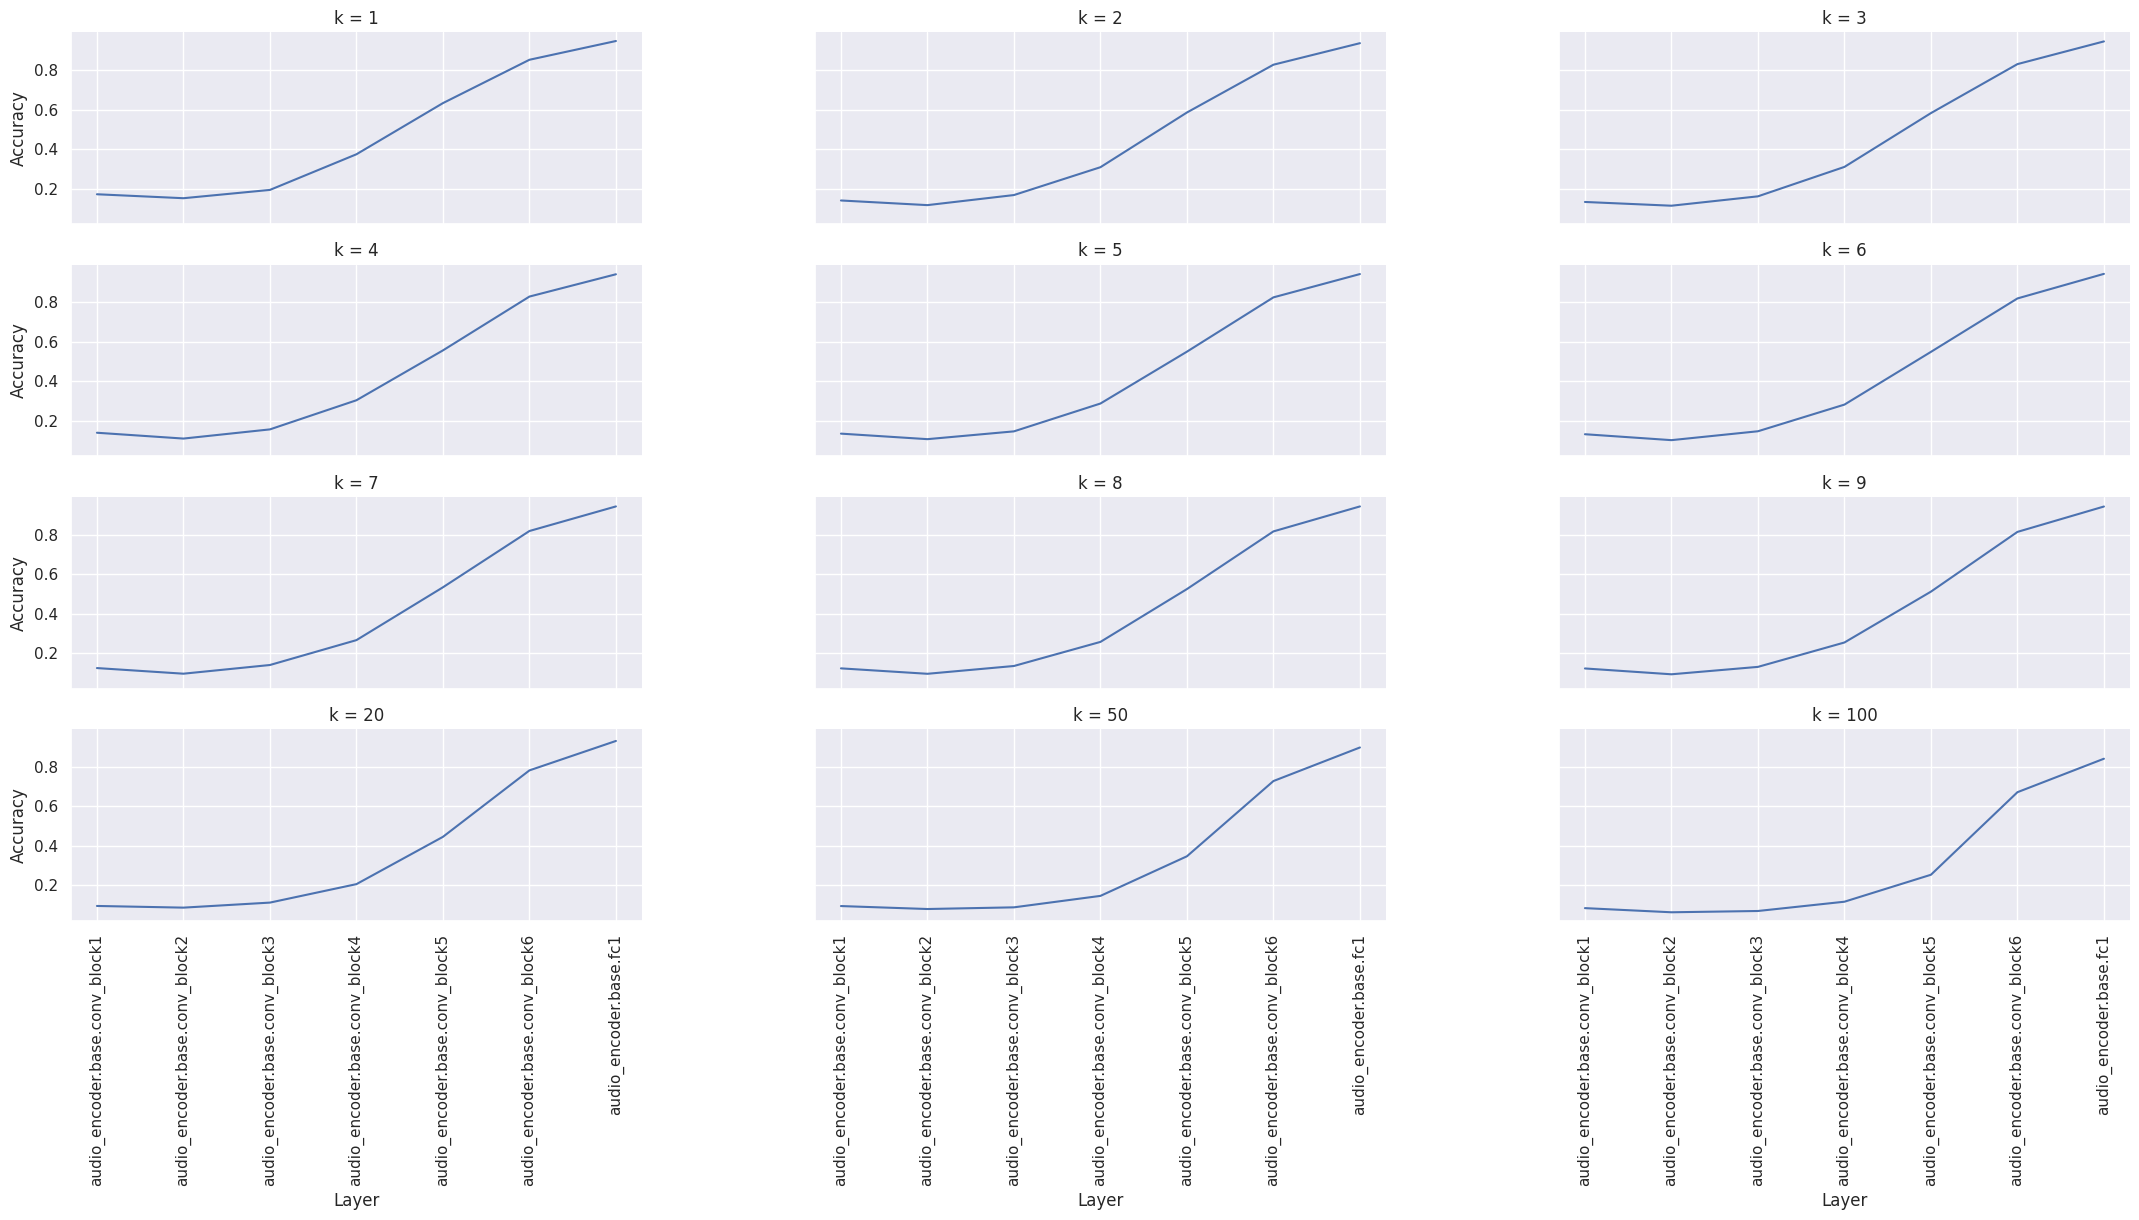

In [8]:
df = save_layerwise_plots(dataset, module_list)

In [9]:
###

In [10]:
df

k                           Layer  Accuracy
0     1  audio_encoder.base.conv_block1    0.1710
1     1  audio_encoder.base.conv_block2    0.1510
2     1  audio_encoder.base.conv_block3    0.1930
3     1  audio_encoder.base.conv_block4    0.3735
4     1  audio_encoder.base.conv_block5    0.6325
..  ...                             ...       ...
79  100  audio_encoder.base.conv_block3    0.0700
80  100  audio_encoder.base.conv_block4    0.1170
81  100  audio_encoder.base.conv_block5    0.2535
82  100  audio_encoder.base.conv_block6    0.6715
83  100          audio_encoder.base.fc1    0.8410

[84 rows x 3 columns]

In [6]:
dfs = [
    save_layerwise_plots(NSynthDataset(class_limit=150), module_list),
    save_layerwise_plots(MedleySolosDBDataset(class_limit=150), module_list, groups=True),
    save_layerwise_plots(GTZANDataset(), module_list),
    save_layerwise_plots(PCVCDataset(classes='consonants'), module_list),
    save_layerwise_plots(SpeechCommandsDataset(class_limit=50), module_list),
    save_layerwise_plots(LibriCountDataset(class_limit=100), module_list),
]

Layer: audio_encoder.base.conv_block1:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block2:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block3:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block4:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block5:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block6:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.fc1:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block1:   0%|          | 0/12 [00:00<?, ?it/s]

(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965


Layer: audio_encoder.base.conv_block2:   0%|          | 0/12 [00:00<?, ?it/s]

(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965


Layer: audio_encoder.base.conv_block3:   0%|          | 0/12 [00:00<?, ?it/s]

(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965


Layer: audio_encoder.base.conv_block4:   0%|          | 0/12 [00:00<?, ?it/s]

(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965


Layer: audio_encoder.base.conv_block5:   0%|          | 0/12 [00:00<?, ?it/s]

(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965


Layer: audio_encoder.base.conv_block6:   0%|          | 0/12 [00:00<?, ?it/s]

(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965


Layer: audio_encoder.base.fc1:   0%|          | 0/12 [00:00<?, ?it/s]

(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965
(965, 965) (965,) 965


Layer: audio_encoder.base.conv_block1:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block2:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block3:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block4:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block5:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block6:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.fc1:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block1:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block2:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block3:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block4:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block5:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block6:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.fc1:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block1:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block2:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block3:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block4:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block5:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block6:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.fc1:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block1:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block2:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block3:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block4:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block5:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.conv_block6:   0%|          | 0/12 [00:00<?, ?it/s]

Layer: audio_encoder.base.fc1:   0%|          | 0/12 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 2250x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 2250x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 2250x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 2250x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 2250x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

In [20]:
best_ks = [1, 1, 1, 7, 1, 20]
dataset_titles = ['NSynth', 'Medley-Solos-DB', 'GTZAN', 'PCVC', 'Speech Commands', 'LibriCount']

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

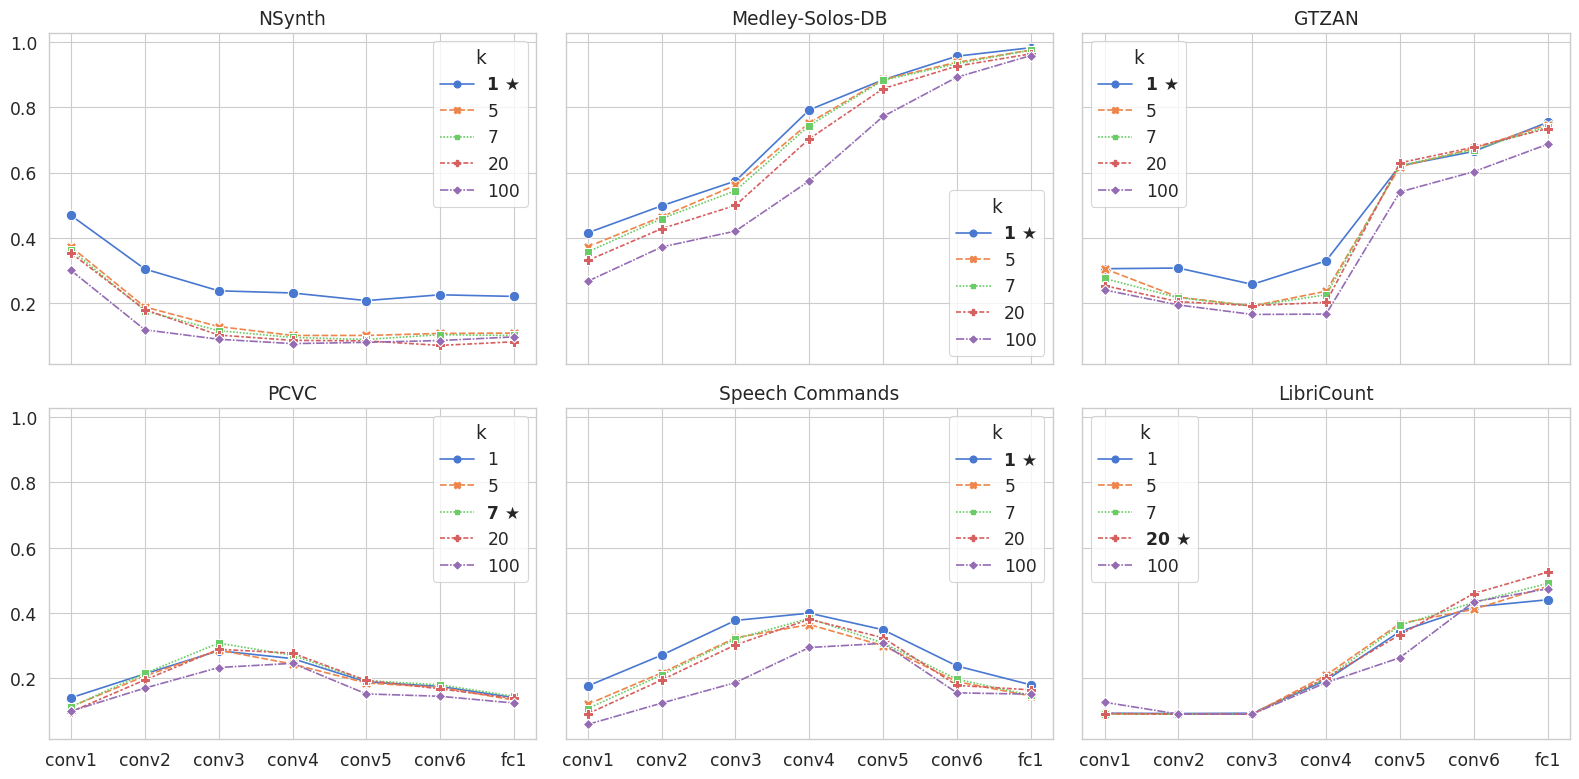

In [22]:
sns.set_theme('paper', style='whitegrid', font_scale=1.4, rc={'figure.figsize': (16, 8)})
plt.subplots(2, 3, sharex=True, sharey=True)

for i, df in enumerate(dfs):
    plt.subplot(2, 3, i + 1)
    sns.lineplot(data=df[df['k'].isin([1, 5, 7, 20, 100] + [best_ks[i]]) & (df['Layer'].str.contains('conv') | df['Layer'].str.contains('fc')) ],
                 x='Layer', y='Accuracy', hue='k', style='k', markers=True, markersize=7.5, palette='muted')
    legend = plt.gca().get_legend()
    texts = legend.get_texts()
    for text in texts:
        if text.get_text() == str(best_ks[i]):
            text.set_text(f'{best_ks[i]} ★')
            text.set_fontweight('bold')
    plt.xticks(ticks=range(7), labels=[f'conv{i}' for i in range(1, 7)] + ['fc1'], rotation=0)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(dataset_titles[i])

plt.tight_layout()
plt.savefig('/scratch/pratyaksh.g/paper-plots/k-layerwise-accuracy.pdf')

In [23]:
# dfs[0][dfs[0]['Layer'].str.contains('block1')]
# dfs[2].sort_values('Accuracy', ascending=False)

In [24]:
if False:
    best_k = 1
    sns.set_theme('paper', style='whitegrid', font_scale=1.2, rc={'figure.figsize': (6, 4)})
    sns.lineplot(data=df[df['k'].isin([1, 7, 20]) & (df['Layer'].str.contains('conv') | df['Layer'].str.contains('fc')) ],
                x='Layer', y='Accuracy', hue='k', style='k', markers=True, markersize=7.5, palette='muted')
    plt.xticks(ticks=range(7), labels=[f'conv{i}' for i in range(1, 7)] + ['fc1'], rotation=0)
    plt.xlabel('')
    plt.ylabel('')
    legend = plt.gca().get_legend()
    texts = legend.get_texts()
    for text in texts:
        if text.get_text() == str(best_k):
            text.set_text(f'{best_k} ★')
            text.set_fontweight('bold')

In [25]:
if False:
    best_k = 1
    sns.set_theme('paper', style="whitegrid", font_scale=1.2, rc={'figure.figsize': (10, 6)})
    sns.lineplot(data=df[(df['Layer'].str.contains('conv') | df['Layer'].str.contains('fc')) ],
                x='Layer', y='Accuracy', hue='k', style='k', markers=True, markersize=8, palette=sns.color_palette('muted', as_cmap=True))
    plt.xticks(ticks=range(7), labels=[f'conv{i}' for i in range(1, 7)] + ['fc1'], rotation=0)
    plt.xlabel('')
    plt.ylabel('Accuracy')
    legend = plt.gca().get_legend()
    texts = legend.get_texts()
    for text in texts:
        if text.get_text() == str(best_k):
            text.set_text(f'{best_k} ★')
            text.set_fontweight('bold')
    plt.savefig('/scratch/pratyaksh.g/paper-plots/esc-50-layerwise-accuracy.pdf')

In [26]:
###

In [39]:
idx = 5
ic(best_ks[idx])
ic(dataset_titles[idx])
dfs[idx].sort_values('Accuracy', ascending=False)

ic| best_ks[idx]: 20
ic| dataset_titles[idx]: 'LibriCount'


k                           Layer  Accuracy
69  20          audio_encoder.base.fc1  0.525455
62   9          audio_encoder.base.fc1  0.508182
55   8          audio_encoder.base.fc1  0.507273
76  50          audio_encoder.base.fc1  0.494545
48   7          audio_encoder.base.fc1  0.490909
..  ..                             ...       ...
58   9  audio_encoder.base.conv_block3  0.090909
57   9  audio_encoder.base.conv_block2  0.090909
43   7  audio_encoder.base.conv_block2  0.090909
44   7  audio_encoder.base.conv_block3  0.090909
29   5  audio_encoder.base.conv_block2  0.090909

[84 rows x 3 columns]

In [28]:
df = pd.concat([df[(df['k'] == best_ks[idx]) & ((df['Layer'].str.contains('conv')) | df['Layer'].str.contains('fc'))] for idx, df in enumerate(dfs)])

In [29]:
len(df)

42

In [30]:
df['Task'] = ['Note Name Classification'] * 7 + ['Instrument Classification'] * 7 + ['Genre Classification'] * 7 + ['Consonant Classification'] * 7 + ['Keyword Recognition'] * 7 + ['Speaker Count Estimation'] * 7

In [31]:
df['Task Type'] = ['Music'] * 21 + ['Speech'] * 21

In [ ]:
sns.set_theme(style='ticks')
fig, axes = plt.subplots(3, 2, figsize=(12, 6), sharex=True)
plt.setp(axes, xticks=range(7), xticklabels=[f'conv{i}' for i in range(1, 7)] + ['fc1'])

axes[0, 0].set_title('Music Tasks', fontweight='bold', pad=15, fontsize=14)
axes[0, 1].set_title('Speech Tasks', fontweight='bold', pad=15, fontsize=14)

num_classes = np.array([
    [12, 23],
    [7, 35],
    [10, 11],
])
chance = 1 / num_classes

chance_pos = np.array([
    [0.05, 0.05],
    [0.05, 0.05],
    [0.05, 0.05],
])

zero_shot = np.array([
    [0.0711, # This is a {} note
     0.0452], # {}
    [0.8518, # This is a sound of {}
     0.0291], # {}
    [0.3070, # This is a {} song
     0.2018], # {} people speaking
])

zs_pos = np.array([
    [4.05, 4.05],
    [4.05, 4.05],
    [4.05, 4.05],
])

legend_loc = [
    ['upper right', 'upper right'],
    ['upper left', 'upper right'],
    ['upper left', 'upper left'],
]


# 6 separate markers
colors = sns.color_palette('tab10')
markers = ['o', 's', 'D', '^', 'v', 'P']

for i, task in enumerate(df['Task'].unique()):
    row, col = i % 3, i // 3
    ax = axes[row, col]

    ax.plot(df[df['Task'] == task]['Layer'], df[df['Task'] == task]['Accuracy'], label=task, color=colors[i], marker=markers[i], markersize=6)

    # single horizontal line for chance
    ax.axhline(y=chance[row, col], color='gray', linestyle='--', linewidth=1)
    ax.text(chance_pos[row, col], chance[row, col], f'chance {100 * chance[row, col]:.1f}%', color='gray', va='bottom', ha='left', fontsize=10)

    ax.axhline(y=zero_shot[row, col], color=colors[i], linestyle='-.', linewidth=1)
    ax.text(zs_pos[row, col], zero_shot[row, col] - 0.02, f'zero-shot {100 * zero_shot[row, col]:.1f}%', color=colors[i], va='top', ha='left', fontsize=10, alpha=0.8)

    # set the y upper limit to slightly more than ymax
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin - 0.1, ymax + 0.1)

    ax.yaxis.set_major_locator(plt.AutoLocator())
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{100 * x:.0f}%'))
    ax.yaxis.set_minor_locator(plt.AutoLocator())

    ax.legend(loc=legend_loc[row][col], frameon=False, fontsize=12)
    # ax.legend(loc='upper left')

    if col == 1:
        ax.yaxis.tick_right()
    ax.xaxis.set_tick_params(which='both', length=0, pad=10)
    ax.yaxis.set_tick_params(which='both', length=5, pad=10)

# fig.text(0.5, 0, 'Layerwise Performance', ha='center', va='center', fontweight='bold', fontsize=12)
fig.text(0, 0.5, 'Accuracy (%)', ha='center', va='center', rotation='vertical', fontweight='bold', fontsize=12)
fig.tight_layout(pad=1.25)

plt.savefig('/scratch/pratyaksh.g/combined-accuracy-vs-layer.pdf', bbox_inches='tight')

In [ ]:
###

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    "Task": ["Note Name Classification", "Instrument Classification", "Genre Classification", "Consonant Classification", "Keyword Recognition", "Speaker Count Estimation"],
    "conv1": [47.5, 41.0, 31.0, 11.0, 20.0, 9.1],
    "conv2": [31.5, 50.0, 31.0, 21.0, 28.0, 9.1],
    "conv3": [24.5, 58.0, 26.0, 31.0, 37.0, 9.1],
    "conv4": [23.5, 82.0, 34.0, 27.0, 38.0, 20.2],
    "conv5": [21.0, 91.0, 63.0, 19.0, 38.0, 33.0],
    "conv6": [23.0, 97.0, 68.0, 18.0, 32.0, 47.0],
    "fc1": [22.5, 98.5, 75.0, 15.0, 20.0, 54.0]
}

In [9]:
# Convert data to dataframe and print it
df = pd.DataFrame(data)
df

Task  conv1  conv2  conv3  conv4  conv5  conv6   fc1
0   Note Name Classification   47.5   31.5   24.5   23.5   21.0   23.0  22.5
1  Instrument Classification   41.0   50.0   58.0   82.0   91.0   97.0  98.5
2       Genre Classification   31.0   31.0   26.0   34.0   63.0   68.0  75.0
3   Consonant Classification   11.0   21.0   31.0   27.0   19.0   18.0  15.0
4        Keyword Recognition   20.0   28.0   37.0   38.0   38.0   32.0  20.0
5   Speaker Count Estimation    9.1    9.1    9.1   20.2   33.0   47.0  54.0

In [5]:
df['Task'].unique()

array(['Note Name Classification', 'Instrument Classification',
       'Genre Classification', 'Consonant Classification',
       'Keyword Recognition', 'Speaker Count Estimation'], dtype=object)

In [16]:
np.array(df[df['Task'] == 'Note Name Classification'])[0][1:]

array([47.5, 31.5, 24.5, 23.5, 21.0, 23.0, 22.5], dtype=object)

In [17]:
sns.set_theme(style='ticks')
fig, axes = plt.subplots(3, 2, figsize=(12, 6), sharex=True)
plt.setp(axes, xticks=range(7), xticklabels=[f'conv{i}' for i in range(1, 7)] + ['fc1'])

axes[0, 0].set_title('Music Tasks', fontweight='bold', pad=15, fontsize=14)
axes[0, 1].set_title('Speech Tasks', fontweight='bold', pad=15, fontsize=14)

num_classes = np.array([
    [12, 23],
    [7, 35],
    [10, 11],
])
chance = 1 / num_classes

chance_pos = np.array([
    [0.05, 0.05],
    [0.05, 0.05],
    [0.05, 0.05],
])

zero_shot = np.array([
    [0.0711, # This is a {} note
     0.0452], # {}
    [0.8518, # This is a sound of {}
     0.0291], # {}
    [0.3070, # This is a {} song
     0.2018], # {} people speaking
])

zs_pos = np.array([
    [4.05, 4.05],
    [4.05, 4.05],
    [4.05, 4.05],
])

legend_loc = [
    ['upper right', 'upper right'],
    ['upper left', 'upper right'],
    ['upper left', 'upper left'],
]


# 6 separate markers
colors = sns.color_palette('tab10')
markers = ['o', 's', 'D', '^', 'v', 'P']

for i, task in enumerate(df['Task'].unique()):
    row, col = i % 3, i // 3
    ax = axes[row, col]

    ax.plot(df[df['Task'] == task][0][1:], label=task, color=colors[i], marker=markers[i], markersize=6)
    # ax.plot(df[df['Task'] == task]['Layer'], df[df['Task'] == task]['Accuracy'], label=task, color=colors[i], marker=markers[i], markersize=6)

    # single horizontal line for chance
    ax.axhline(y=chance[row, col], color='gray', linestyle='--', linewidth=1)
    ax.text(chance_pos[row, col], chance[row, col], f'chance {100 * chance[row, col]:.1f}%', color='gray', va='bottom', ha='left', fontsize=10)

    ax.axhline(y=zero_shot[row, col], color=colors[i], linestyle='-.', linewidth=1)
    ax.text(zs_pos[row, col], zero_shot[row, col] - 0.02, f'zero-shot {100 * zero_shot[row, col]:.1f}%', color=colors[i], va='top', ha='left', fontsize=10, alpha=0.8)

    # set the y upper limit to slightly more than ymax
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin - 0.1, ymax + 0.1)

    ax.yaxis.set_major_locator(plt.AutoLocator())
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{100 * x:.0f}%'))
    ax.yaxis.set_minor_locator(plt.AutoLocator())

    ax.legend(loc=legend_loc[row][col], frameon=False, fontsize=12)
    # ax.legend(loc='upper left')

    if col == 1:
        ax.yaxis.tick_right()
    ax.xaxis.set_tick_params(which='both', length=0, pad=10)
    ax.yaxis.set_tick_params(which='both', length=5, pad=10)

# fig.text(0.5, 0, 'Layerwise Performance', ha='center', va='center', fontweight='bold', fontsize=12)
fig.text(0, 0.5, 'Accuracy (%)', ha='center', va='center', rotation='vertical', fontweight='bold', fontsize=12)
fig.tight_layout(pad=1.25)

plt.savefig('/scratch/pratyaksh.g/combined-accuracy-vs-layer.pdf', bbox_inches='tight')